In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']))
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## **Data Cleaning and Data Visualization :**

In [ ]:
print("the data shape : ",data.shape)

the data shape :  (5110, 12)


In [ ]:
print("more info about the data: ")
print("*************************")
print(data.info)

more info about the data: 
*************************
<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#the number of null values in our dataset
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


> as we can see,
*   we have Null values in the column "bmi" that we should fill with the mean value.
*   there is no need of the comlumn ID we can drop it.
*   we have the word "unknown" in the "smoking-status" column that we need to change.
*   there are columns that need to change there values to 0/1 binary values like "gender","ever_married","somking_status" and "Residence_type". 
*   Also the column "work_type" , we should change the type to int64





1.  Replacing the null values with the mean




In [ ]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)
print('No more null values')
print(data.isnull().sum())
print('We can see that the statistiques are still the same')
print(data['bmi'].describe())

No more null values
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
We can see that the statistiques are still the same
count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64



2.   Droping useless columns



In [ ]:
data.drop('id',axis=1,inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0




3.   Removing Outliers




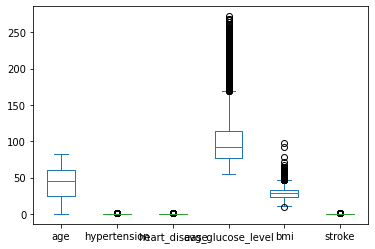

In [ ]:
data.plot(kind='box')
plt.show()

We can see that we have outliers in the two columns "bmi" and 	"avg_glucose_level" .

In [ ]:
data["avg_glucose_level"].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [ ]:
data["bmi"].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

The number of outliers is very big comparing to the number of rows that we have in our dataset so its acceptable to keep them!




> Bloc en retrait





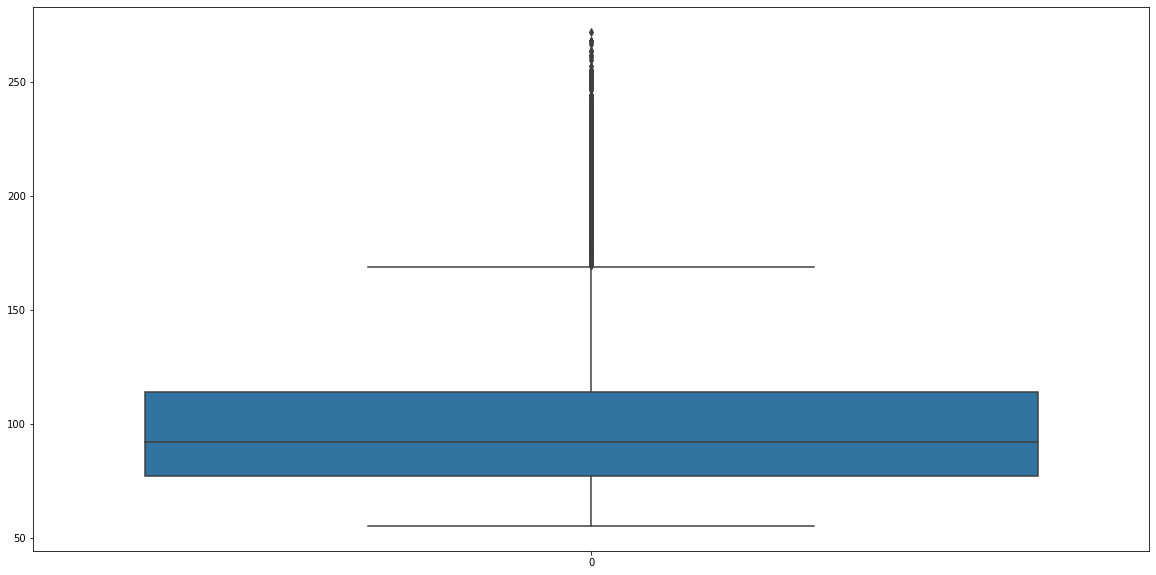

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(data=data["avg_glucose_level"])

In [ ]:
q1 = data["avg_glucose_level"].quantile(0.25)
q3 = data["avg_glucose_level"].quantile(0.75)
iqr = q3 - q1
max = q3 + (1.5 * iqr)
min = q1 - (1.5 * iqr)

In [ ]:
data[data["avg_glucose_level"]>max]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.300000,never smoked,0
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.900000,never smoked,0
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.700000,Unknown,0
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.300000,Unknown,0


We have 627 outliers here 


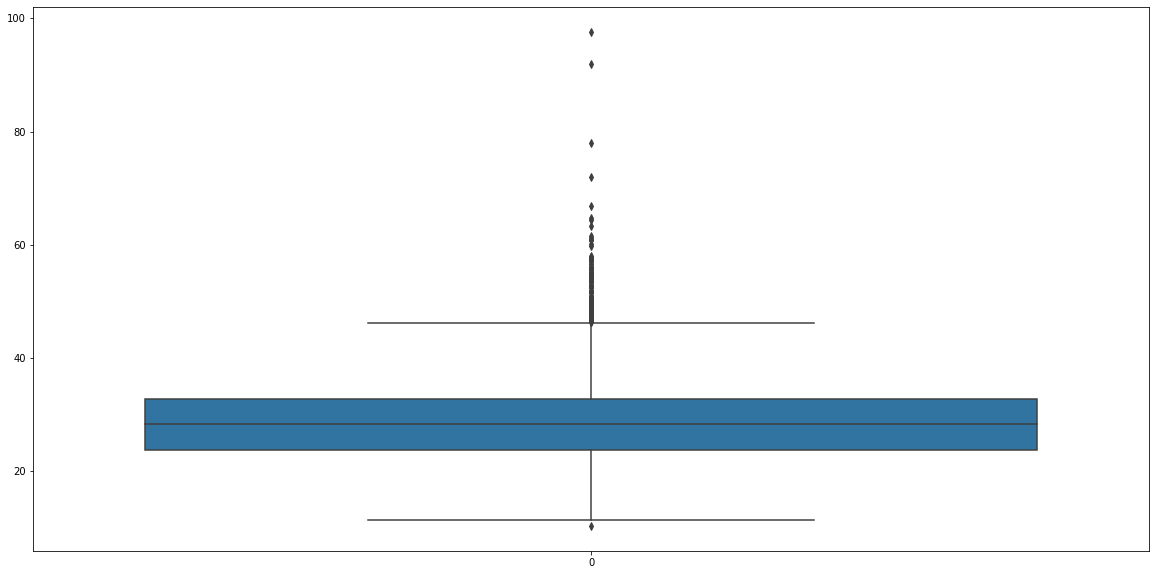

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data["bmi"])

In [ ]:
q1 = data["bmi"].quantile(0.25)
q3 = data["bmi"].quantile(0.75)
iqr = q3 - q1
max = q3 + (1.5 * iqr)
min = q1 - (1.5 * iqr)

In [ ]:
data[data["bmi"]>max]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
66,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
4906,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0
5057,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0


We have 125 ouliers here 


In [ ]:



627+125


752

We have 752 outliers


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## **Data Visualization :**

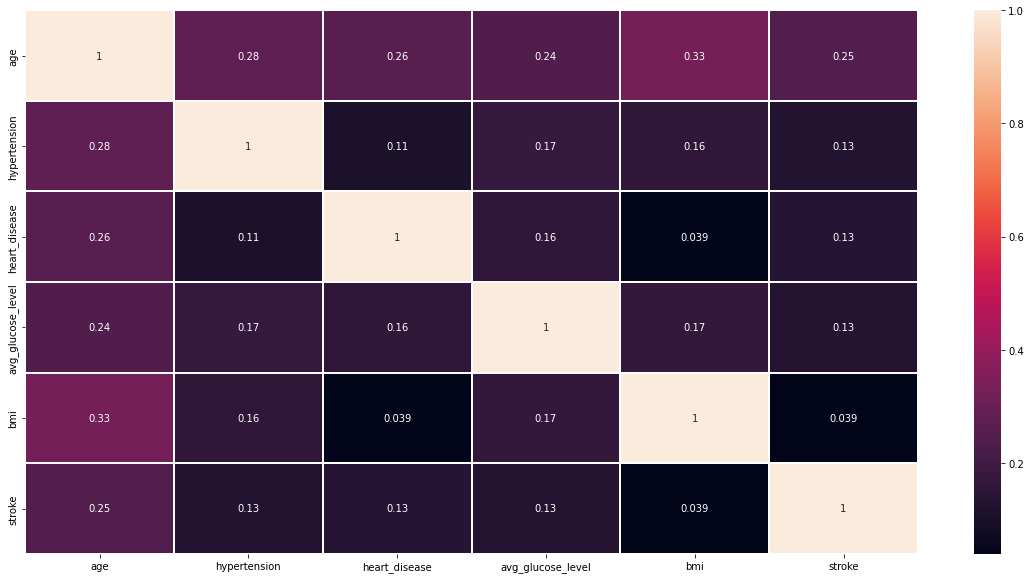

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
corr = data.corr()
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()

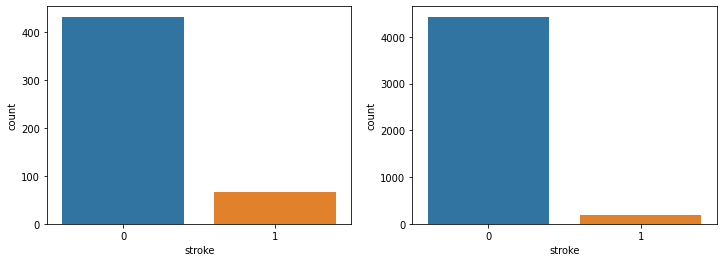

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.countplot(ax=ax[0], data=data[data.hypertension == 1], x='stroke')
sns.countplot(ax=ax[1], data=data[data.hypertension == 0], x='stroke')

plt.show()

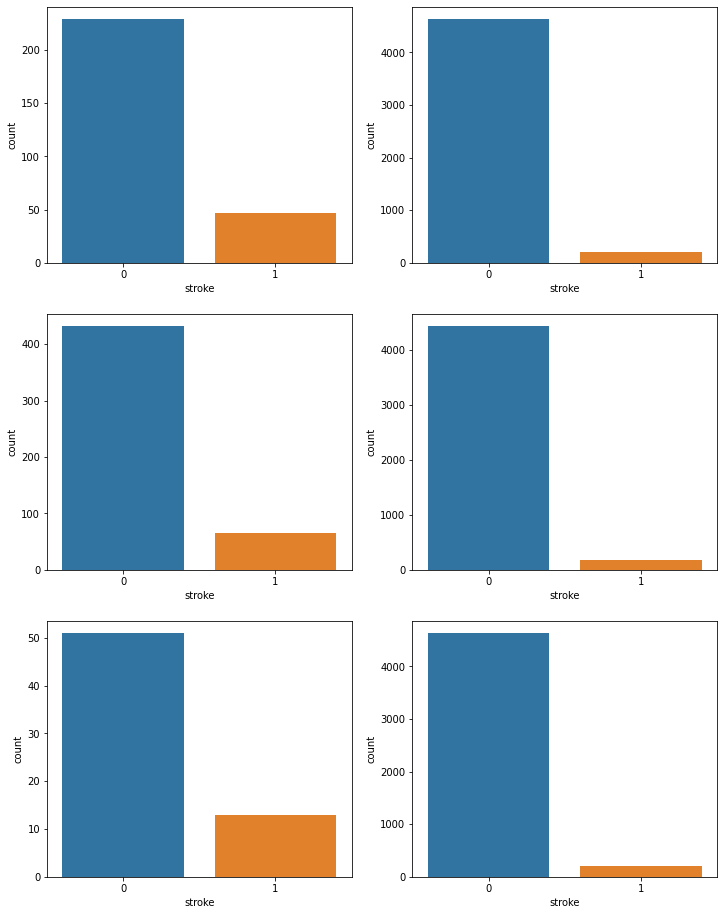

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(12,16))

sns.countplot(ax=ax[0,0], data=data[data.heart_disease == 1], x='stroke')
sns.countplot(ax=ax[0,1], data=data[data.heart_disease == 0], x='stroke')

sns.countplot(ax=ax[1,0], data=data[data.hypertension == 1], x='stroke')
sns.countplot(ax=ax[1,1], data=data[data.hypertension == 0], x='stroke')

sns.countplot(ax=ax[2,0], data=data[(data.heart_disease == 1) & (data.hypertension == 1)], x='stroke')
sns.countplot(ax=ax[2,1], data=data[data.heart_disease == 0 & (data.hypertension == 0)], x='stroke')

plt.show()

In [ ]:
data.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
data.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

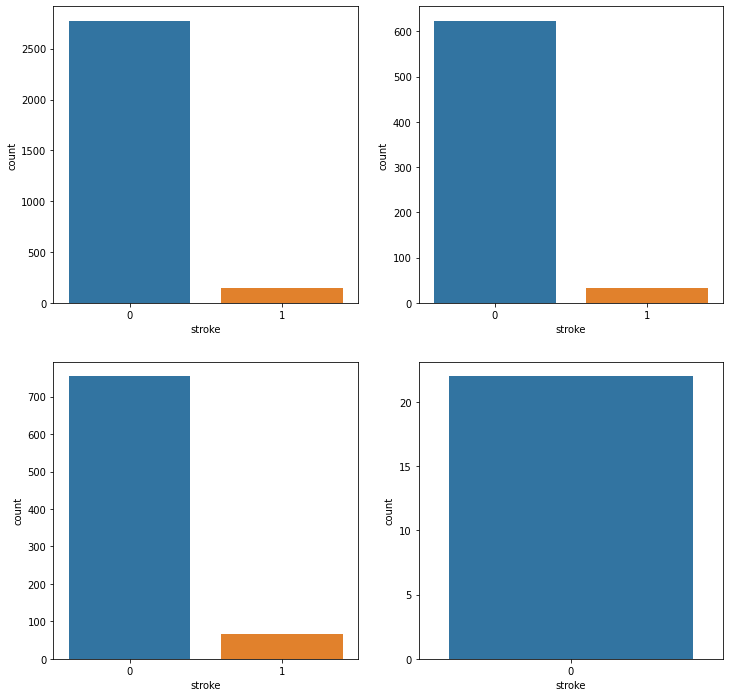

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

sns.countplot(ax=ax[0,0], data=data[data.work_type== 'Private'], x='stroke')
sns.countplot(ax=ax[0,1], data=data[data.work_type == 'Govt_job'], x='stroke')
sns.countplot(ax=ax[1,0], data=data[data.work_type == 'Self-employed'], x='stroke')

sns.countplot(ax=ax[1,1], data=data[data.work_type == 'Never_worked'], x='stroke')


plt.show()

We can remark that there are a lot of stroke in the group that never worked. But since working is good for health so this shows us that correlation does not mean causation

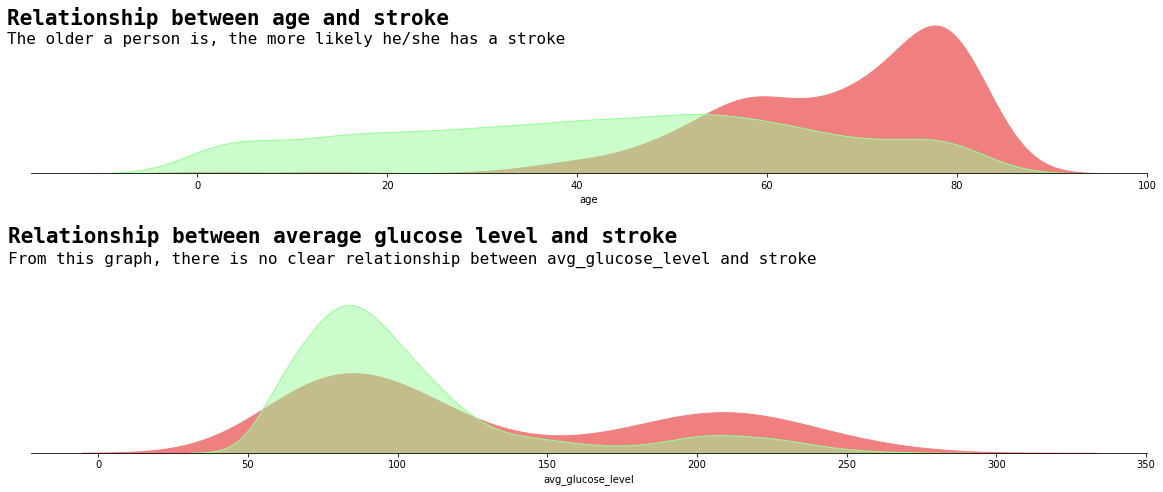

In [ ]:
fig=plt.figure(figsize=(20,8),facecolor='white')

ax=[None for i in range(2)]
gs=fig.add_gridspec(2,1)
gs.update(wspace=0, hspace=0.8)

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])

ax[0].text(-20,0.04,'Relationship between age and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[0].text(-20,0.035,'The older a person is, the more likely he/she has a stroke',fontsize=16,fontweight='light', fontfamily='monospace')
ax[1].text(-30,0.023,'Relationship between average glucose level and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[1].text(-30,0.0207,'From this graph, there is no clear relationship between avg_glucose_level and stroke',fontsize=16,fontweight='light', fontfamily='monospace')

sns.kdeplot(data=data[data.stroke==1],x='age',ax=ax[0],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=data[data.stroke==0],x='age',ax=ax[0],shade=True,color='palegreen',alpha=0.5)
sns.kdeplot(data=data[data.stroke==1],x='avg_glucose_level',ax=ax[1],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=data[data.stroke==0],x='avg_glucose_level',ax=ax[1],shade=True,color='palegreen',alpha=0.5)
for i in range(2):
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

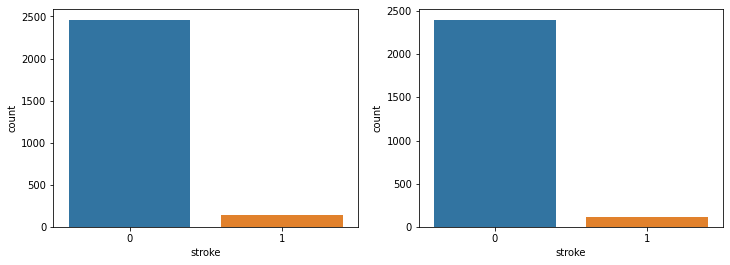

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.countplot(ax=ax[0], data=data[data.Residence_type == 'Urban'], x='stroke')
sns.countplot(ax=ax[1], data=data[data.Residence_type == 'Rural'], x='stroke')

plt.show()

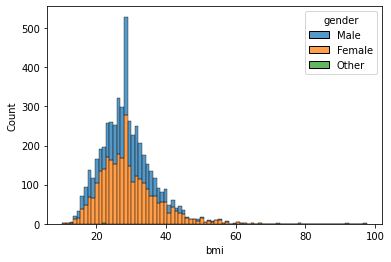

In [ ]:
sns.histplot(data=data, x='bmi', hue='gender', multiple='stack')
plt.show()

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women


What is normal BMI?



1.   If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range.
2.   If your BMI is 25.0 to 29.9, it falls within the overweight range.
3.   If your BMI is 30.0 or higher, it falls within the obese range.

we can see that the majority have an average bmi
 



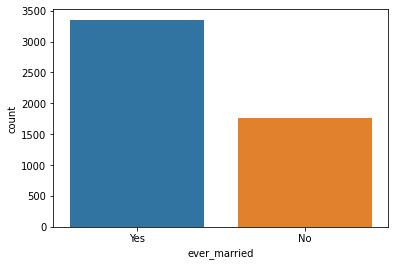

In [ ]:
sns.countplot(data=data, x='ever_married')
plt.show()

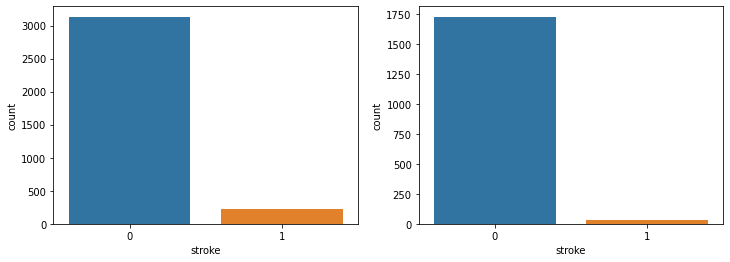

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.countplot(ax=ax[0], data=data[data.ever_married == 'Yes'], x='stroke')
sns.countplot(ax=ax[1], data=data[data.ever_married == 'No'], x='stroke')

plt.show()

In [ ]:
print(data[data.ever_married == 'Yes'].stroke.value_counts())
print(data[data.ever_married == 'No'].stroke.value_counts())

0    3133
1     220
Name: stroke, dtype: int64
0    1728
1      29
Name: stroke, dtype: int64


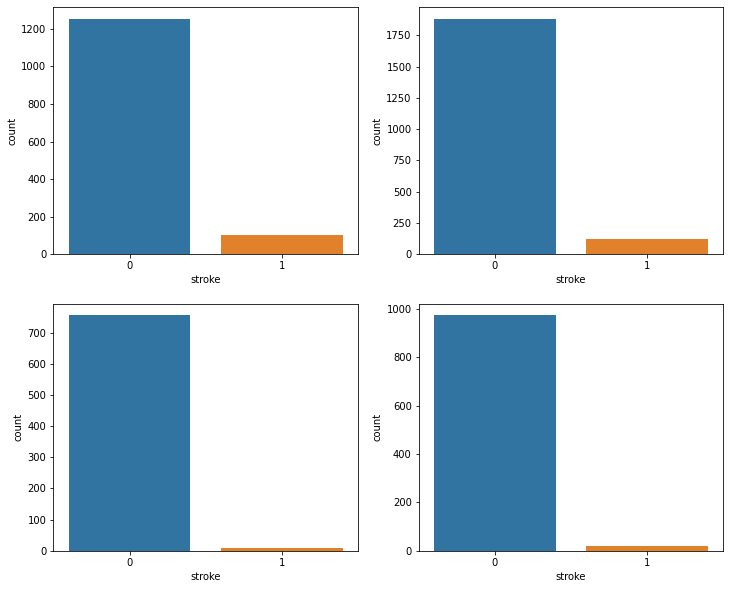

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

sns.countplot(ax=ax[0,0], data=data[(data.ever_married == 'Yes') & (data.gender == 'Male')],
              x='stroke')
sns.countplot(ax=ax[0,1], data=data[(data.ever_married == 'Yes') & (data.gender == 'Female')],
              x='stroke')
sns.countplot(ax=ax[1,0], data=data[(data.ever_married == 'No') & (data.gender == 'Male')],
              x='stroke')
sns.countplot(ax=ax[1,1], data=data[(data.ever_married == 'No') & (data.gender == 'Female')],
              x='stroke')
plt.show()

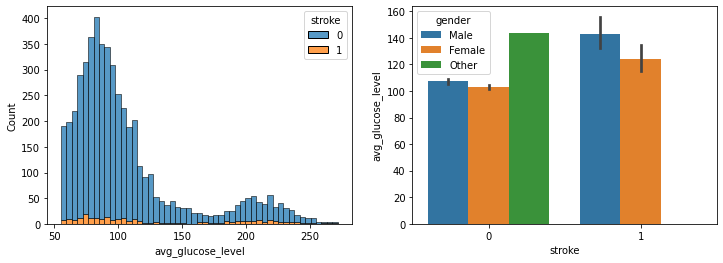

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.histplot(ax=ax[0], data=data, x='avg_glucose_level', hue='stroke', multiple='stack')
sns.barplot(ax=ax[1], data=data, x='stroke', y='avg_glucose_level', hue='gender')

plt.show()


People having stroke tends to have a higher average blood glucose level


5.   Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
gender=enc.fit_transform(data['gender'])
smoking_status=enc.fit_transform(data['smoking_status'])
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])
data['work_type']=work_type
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender


In [ ]:

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


The types of our data are float and integer , there is no more outliers and no more useless columns !


> Our data is cleaned and ready to be used !

In [ ]:
X=data.drop('stroke',axis=1)
Y=data['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred=dt.predict(X_test_std)

In [ ]:
from sklearn.metrics import accuracy_score
ac_dt=accuracy_score(Y_test,Y_pred)
ac_dt

0.9031311154598826

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_std,Y_train)
Y_pred_lr=lr.predict(X_test_std)

In [ ]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)
ac_lr

0.9383561643835616

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=1e-3,hidden_layer_sizes=(5, 2), max_iter=100, random_state=1)
clf.fit(X_train_std,Y_train)
Y_pred_dnn=clf.predict(X_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
accuracy_score(Y_test,Y_pred_dnn)

0.9393346379647749

In [ ]:
q1 = data["avg_glucose_level"].quantile(0.25)
q3 = data["avg_glucose_level"].quantile(0.75)
iqr = q3 - q1
max = q3 + (1.5 * iqr)
min = q1 - (1.5 * iqr)
data = data[data["avg_glucose_level"]<max]


X=data.drop('stroke',axis=1)
Y=data['stroke']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-3,hidden_layer_sizes=(5, 2), max_iter=300, random_state=1)
clf.fit(X_train_std,Y_train)
Y_pred_dnn=clf.predict(X_test_std)
accuracy_score(Y_test,Y_pred_dnn)

0.9665551839464883

In [ ]:
lr=LogisticRegression()
lr.fit(X_train_std,Y_train)
Y_pred_lr=lr.predict(X_test_std)
ac_lr=accuracy_score(Y_test,Y_pred_lr)
ac_lr

0.9665551839464883